In [1]:
 # Display the raw DataFrame
import pandas as pd

df_raw = pd.read_csv(r'C:\Users\Yathin Muthavarapu\Desktop\Capstone-2\federal-candidates-2023-12-11rev.csv', encoding='latin1')
df_raw

C:\Users\Yathin Muthavarapu\AppData\Local\Temp\ipykernel_21240\2451625392.py:4: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(r'C:\Users\Yathin Muthavarapu\Desktop\Capstone-2\federal-candidates-2023-12-11rev.csv', encoding='latin1')


,id,parliament,year,type_elxn,elected,candidate_name,edate,incumbent,gender,birth_year,...,acclaimed,switcher,multiple_candidacy,party_raw,party_minor_group,party_major_group,gov_party_raw,gov_minor_group,gov_major_group,num_candidates
0,26093,1,1867,General,Elected,"POWER,",1867-08-07,Not incumbent,M,1815.0,...,Not acclaimed,Switcher,Single,Anti-Confederate,Third_Party,Third_Party,Conservative,Conservative,Conservative,4
1,13011,1,1867,General,Elected,"JONES,",1867-08-07,Not incumbent,M,1824.0,...,Not acclaimed,Switcher,Single,Labour,Labour,Third_Party,Conservative,Conservative,Conservative,4
2,27974,1,1867,General,Not elected,"SHANNON, S.L.",1867-08-07,Not incumbent,M,NaN,...,Not acclaimed,Not switcher,Single,Unknown,Independent,Independent,Conservative,Conservative,Conservative,4
3,18040,1,1867,General,Elected,"KIRKPATRICK, Thomas",1867-08-07,Not incumbent,M,1805.0,...,Not acclaimed,Not switcher,Single,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,2
4,1798,1,1867,General,Elected,"BLANCHET, Hon. J.G.",1867-08-07,Not incumbent,M,1829.0,...,Acclaimed,Not switcher,Single,Liberal-Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46521,36038,44,2021,General,Not elected,"Bandou, Rachid",2021-09-20,Not incumbent,M,NaN,...,Not acclaimed,Not switcher,Single,Bloc QuÃ©bÃ©cois,Bloc,Bloc,Liberal Party of Canada,Liberal,Liberal,5
46522,33663,44,2021,General,Elected,"Zahid, Salma",2021-09-20,Incumbent,F,1970.0,...,Not acclaimed,Not switcher,Single,Liberal Party of Canada,Liberal,Liberal,Liberal Party of Canada,Liberal,Liberal,5
46523,36037,44,2021,General,Not elected,"Jemmah, Rachid",2021-09-20,Not incumbent,M,NaN,...,Not acclaimed,Not switcher,Single,Green Party of Canada,Green,Third_Party,Liberal Party of Canada,Liberal,Liberal,9
46524,32856,44,2021,General,Elected,"McLeod, Michael",2021-09-20,Incumbent,M,1959.0,...,Not acclaimed,Not switcher,Single,Liberal Party of Canada,Liberal,Liberal,Liberal Party of Canada,Liberal,Liberal,5


In [2]:
# Display the column names of the DataFrame
df_raw.columns

Index(['id', 'parliament', 'year', 'type_elxn', 'elected', 'candidate_name',
       'edate', 'incumbent', 'gender', 'birth_year', 'country_birth',
       'lgbtq2_out', 'indigenousorigins', 'occupation', 'lawyer',
       'censuscategory', 'riding_id', 'riding', 'province', 'votes',
       'percent_votes', 'acclaimed', 'switcher', 'multiple_candidacy',
       'party_raw', 'party_minor_group', 'party_major_group', 'gov_party_raw',
       'gov_minor_group', 'gov_major_group', 'num_candidates'],
      dtype='object')

In [3]:
# Filter the DataFrame to include only the selected columns
selected_columns = ['id','year', 'type_elxn', 'elected', 'candidate_name', 'incumbent', 'gender', 'birth_year', 'indigenousorigins', 'occupation', 'riding', 'province', 'votes','percent_votes','party_major_group','gov_major_group',]
df_raw = df_raw[selected_columns]

In [4]:
# Filter data to include only rows where the year is between 1946 and 2021
df = df_raw.loc[df_raw['year'].between(1946, 2021)]

In [5]:
# Output the shape (number of rows and columns) of the filtered DataFrame
df.shape

(34966, 16)

In [6]:
# Display the data types of each column in the DataFrame 'df'
df.dtypes

id                     int64
year                   int64
type_elxn             object
elected               object
candidate_name        object
incumbent             object
gender                object
birth_year           float64
indigenousorigins     object
occupation            object
riding                object
province              object
votes                float64
percent_votes        float64
party_major_group     object
gov_major_group       object
dtype: object

In [7]:
# Convert the 'birth_year' column to numeric values
# Non-numeric entries are converted to NaN using errors='coerce'
# Then, the column is cast to nullable integer type 'Int64' (not the default 'int64')
df['birth_year'] = pd.to_numeric(df['birth_year'], errors='coerce').astype('Int64')
# Convert the 'votes' column to numeric values, coercing invalid data to NaN
# Cast the result to nullable 'Int64' to support missing values
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').astype('Int64')
# Display the updated data types of all columns to confirm the changes
df.dtypes

C:\Users\Yathin Muthavarapu\AppData\Local\Temp\ipykernel_21240\3535793944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth_year'] = pd.to_numeric(df['birth_year'], errors='coerce').astype('Int64')
C:\Users\Yathin Muthavarapu\AppData\Local\Temp\ipykernel_21240\3535793944.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['votes'] = pd.to_numeric(df['votes'], errors='coerce').astype('Int64')


id                     int64
year                   int64
type_elxn             object
elected               object
candidate_name        object
incumbent             object
gender                object
birth_year             Int64
indigenousorigins     object
occupation            object
riding                object
province              object
votes                  Int64
percent_votes        float64
party_major_group     object
gov_major_group       object
dtype: object

In [8]:
 # Print the total number of missing (NaN) values in each column of the DataFrame
print(df.isnull().sum())

id                       0
year                     0
type_elxn                0
elected                  0
candidate_name           0
incumbent                1
gender                   1
birth_year           27925
indigenousorigins        0
occupation             243
riding                   0
province                 0
votes                   35
percent_votes           30
party_major_group        0
gov_major_group          0
dtype: int64


In [9]:
# Define a list of columns to check for missing values
columns_to_check = ['occupation', 'votes','percent_votes','incumbent','gender']
# Drop any rows in the DataFrame that have missing (NaN) values in any of the specified columns
df = df.dropna(subset=columns_to_check)
print(df.shape)
print(df.isnull().sum())

(34692, 16)
id                       0
year                     0
type_elxn                0
elected                  0
candidate_name           0
incumbent                0
gender                   0
birth_year           27698
indigenousorigins        0
occupation               0
riding                   0
province                 0
votes                    0
percent_votes            0
party_major_group        0
gov_major_group          0
dtype: int64


In [10]:
df.shape

(34692, 16)

In [11]:
# Add a sequential ID column starting from 1
df['count'] = range(1, len(df) + 1)
# Set 'count' as the DataFrame index
df.set_index('count', inplace=True)
df.head()


,id,year,type_elxn,elected,candidate_name,incumbent,gender,birth_year,indigenousorigins,occupation,riding,province,votes,percent_votes,party_major_group,gov_major_group
count,,,,,,,,,,,,,,,,
1,1264,1946,By-election,Not elected,"BÃLEC, Hector",Not incumbent,M,<NA>,Other,contractor,PONTIAC,Quebec,7487,23.525530,Conservative,Liberal
2,20108,1946,By-election,Not elected,"LABELLE, Lucien",Not incumbent,M,<NA>,Other,lawyer,PONTIAC,Quebec,10379,32.612724,Liberal,Liberal
3,23922,1946,By-election,Not elected,"MOLLOY, Bernard",Not incumbent,M,<NA>,Other,foreman,PONTIAC,Quebec,1975,6.205813,Independent,Liberal
4,27375,1946,By-election,Not elected,"ROY, Oscar",Not incumbent,M,<NA>,Other,organizer,PONTIAC,Quebec,572,1.797329,Independent,Liberal
5,3206,1946,By-election,Elected,"CAOUETTE, RÃ©al",Not incumbent,M,1917,Other,manager,PONTIAC,Quebec,11412,35.858601,Third_Party,Liberal


In [12]:
# Select specific columns to check for their unique values
unique_values= df[['year','elected','type_elxn','incumbent','gender','indigenousorigins','occupation','province','party_major_group','gov_major_group']]
# Loop through each column and print its unique values
for column in unique_values:
  print(f"\nUnique values for {column}: {df[column].unique()}")


Unique values for year: [1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1957 1958 1959 1960
 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1986 1987 1988 1989 1990
 1993 1995 1996 1997 1998 1999 2000 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]

Unique values for elected: ['Not elected' 'Elected']

Unique values for type_elxn: ['By-election' 'General']

Unique values for incumbent: ['Not incumbent' 'Incumbent']

Unique values for gender: ['M' 'F' '2']

Unique values for indigenousorigins: ['Other' 'Indigenous']

Unique values for occupation: ['contractor' 'lawyer' 'foreman' ... 'Commucations Assistant'
 'OBNL Cultural Management Instructor' 'Senior Quality Control Technician']

Unique values for province: ['Quebec' 'Manitoba' 'Ontario' 'Nova Scotia' 'New Brunswick'
 'British Columbia' 'Saskatchewan' 'Alberta' 'Newfoundland and Labrador'
 'Prince Edward Isla

In [13]:
# sorted list of unique, non-null occupations
unique_occ = sorted(df['occupation'].dropna().unique())
unique_occ[0:20]

['"douteulogue"',
 '"foulosophe"',
 '3D printing designer',
 'A&W franchisee',
 'Academic',
 'Account Executive',
 'Account Manager',
 'Accountant',
 'Accounting',
 'Accounting Assistant',
 'Accounting Secretary',
 'Accounting and Payroll',
 'Acrobatics Trainer',
 'Activist',
 'Actor',
 'Actor / Writer',
 'Actuary',
 'Acupuncturist',
 'Addiction Counsellor',
 'Addiction Social Worker']

In [14]:
def clean_occupation(occupation):
  if pd.isnull(occupation):    # Return as-is if occupation is missing
    return occupation
  occupation = occupation.upper()   # Convert to uppercase for consistency
  occupation = occupation.split('/')[0].strip()  # remove alternate job titles
  occupation = occupation.split(',')[0].strip()  # remove extra descriptions
  occupation = occupation.split('(')[0].strip()  # remove notes or clarifications
  return occupation
# Apply the cleaning function to the 'occupation' column
df['occupation'] = df['occupation'].apply(clean_occupation)
# Remove any remaining non-alphabetic characters (e.g., numbers, punctuation)
df['occupation'] = df['occupation'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
# Get a sorted list of cleaned unique occupations
unique_occ = sorted(df['occupation'].unique())
unique_occ[0:100]

['ACADEMIC',
 'ACADEMIC ADVISOR',
 'ACCOMMODATION MANAGER',
 'ACCOUNT EXECUTIVE',
 'ACCOUNT MANAGER',
 'ACCOUNT MANAGER  STUDENT',
 'ACCOUNT REPRESENTATIVE',
 'ACCOUNTANT',
 'ACCOUNTANT AND BUSINESS MANAGEMENT',
 'ACCOUNTANT AND REALTOR',
 'ACCOUNTANT AUDITOR',
 'ACCOUNTANT MANAGER',
 'ACCOUNTING',
 'ACCOUNTING ADMINISTRATOR',
 'ACCOUNTING AND PAYROLL',
 'ACCOUNTING ASSISTANT',
 'ACCOUNTING CLERK',
 'ACCOUNTING CONSULTANT',
 'ACCOUNTING SECRETARY',
 'ACCOUNTING TEACHER',
 'ACCOUNTING TECHNICIAN',
 'ACCOUNTS ADMINISTRATOR',
 'ACCOUNTS CLERK',
 'ACCOUNTS EXECUTIVE',
 'ACCOUNTS MANAGER',
 'ACCOUNTS PAYABLE COORDINATOR',
 'ACCOUNTS RECEIVABLE CLERK',
 'ACOUSTICAL CARPENTER',
 'ACROBATICS TRAINER',
 'ACTING SUPERVISOR',
 'ACTIVE MESSENGER',
 'ACTIVE TRANSPORT WORKER',
 'ACTIVIST',
 'ACTIVITIES DIRECTOR',
 'ACTIVITY COORDINATOR',
 'ACTOR',
 'ACTOR  WRITER  FILM MAKER',
 'ACTUARY',
 'ACUPUNCTURIST',
 'ADDICTION COUNSELLOR',
 'ADDICTION SERVICES COMMUNITY EDUCATOR',
 'ADDICTION SOCIAL WORKER',

In [15]:
df_gender_2 = df[df['gender'] == '2']
df_gender_2

,id,year,type_elxn,elected,candidate_name,incumbent,gender,birth_year,indigenousorigins,occupation,riding,province,votes,percent_votes,party_major_group,gov_major_group
count,,,,,,,,,,,,,,,,
34083,34718,2021,General,Not elected,"Walker, Gillian",Not incumbent,2,<NA>,Other,EDUCATOR,Saskatoon--Grasswood,Saskatchewan,556,1.219191,Third_Party,Liberal
34216,35663,2021,General,Not elected,"Woodmass, Rowan",Not incumbent,2,<NA>,Other,DESIGN LEAD,Laval--Les Ãles,Quebec,3889,7.686226,CCF_NDP,Liberal


In [16]:
# Replace '2' with 'T' in the 'gender' column
df['gender'] = df['gender'].replace('2', 'T')
df_gender_T = df[df['gender'] == 'T']
df_gender_T

,id,year,type_elxn,elected,candidate_name,incumbent,gender,birth_year,indigenousorigins,occupation,riding,province,votes,percent_votes,party_major_group,gov_major_group
count,,,,,,,,,,,,,,,,
34083,34718,2021,General,Not elected,"Walker, Gillian",Not incumbent,T,<NA>,Other,EDUCATOR,Saskatoon--Grasswood,Saskatchewan,556,1.219191,Third_Party,Liberal
34216,35663,2021,General,Not elected,"Woodmass, Rowan",Not incumbent,T,<NA>,Other,DESIGN LEAD,Laval--Les Ãles,Quebec,3889,7.686226,CCF_NDP,Liberal


In [17]:
twelfth_row_candidate_name = df.loc[31, 'candidate_name']
twelfth_row_candidate_name

'CHAMBERS, Edward John'

In [18]:
# Remove trailing commas and whitespace
df['candidate_name'] = df['candidate_name'].str.strip().str.rstrip(',')

# Remove any rows where candidate_name is empty after cleaning
df = df.dropna(subset=['candidate_name'])

# Remove any non-alphabetic characters (except spaces)
df['candidate_name'] = df['candidate_name'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Remove extra whitespace
df['candidate_name'] = df['candidate_name'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Convert to title case for consistency
df['candidate_name'] = df['candidate_name'].str.title()

In [19]:
twelfth_row_candidate_name = df.loc[31, 'candidate_name']
twelfth_row_candidate_name

'Chambers Edward John'

In [20]:
unique_ridings_before = sorted(df['riding'].dropna().unique())
unique_ridings_before[0:20]

['ABBOTSFORD',
 'ABITIBI',
 'ABITIBI--BAIE-JAMES--NUNAVIK',
 'ABITIBI--BAIE-JAMES--NUNAVIK--EEYOU',
 'ABITIBI--TÃ\x89MISCAMINGUE',
 'ACADIA',
 'ACADIE--BATHURST',
 'AHUNTSIC',
 'AHUNTSIC-CARTIERVILLE',
 'AJAX',
 'AJAX--PICKERING',
 'ALFRED-PELLAN',
 'ALGOMA',
 'ALGOMA EAST',
 'ALGOMA WEST',
 'ALGOMA--MANITOULIN',
 'ALGOMA--MANITOULIN--KAPUSKASING',
 'ANCASTER--DUNDAS--FLAMBOROUGH--ALDERSHOT',
 'ANCASTER--DUNDAS--FLAMBOROUGH--WESTDALE',
 'ANJOU--RIVIÃ\x88RE-DES-PRAIRIES']

In [21]:
df['riding'] = df['riding'].str.upper()
df['riding'] = df['riding'].str.split('-').str[0].str.strip()
df['riding'] = df['riding'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
unique_ridings_after = sorted(df['riding'].unique())
unique_ridings_after[0:100]

['ABBOTSFORD',
 'ABITIBI',
 'ACADIA',
 'ACADIE',
 'AHUNTSIC',
 'AJAX',
 'ALFRED',
 'ALGOMA',
 'ALGOMA EAST',
 'ALGOMA WEST',
 'ANCASTER',
 'ANJOU',
 'ANNAPOLIS',
 'ANNAPOLIS VALLEY',
 'ANTIGONISH',
 'ARGENTEUIL',
 'ASSINIBOIA',
 'ATHABASCA',
 'ATHABASKA',
 'AURORA',
 'AVALON',
 'AVIGNON',
 'BANFF',
 'BARRIE',
 'BAS',
 'BATTLE RIVER',
 'BATTLEFORD',
 'BATTLEFORDS',
 'BAY OF QUINTE',
 'BCANCOUR',
 'BEACHES',
 'BEAUCE',
 'BEAUHARNOIS',
 'BEAUPORT',
 'BEAUSJOUR',
 'BEAVER RIVER',
 'BELLECHASSE',
 'BELOEIL',
 'BERTHIER',
 'BLACKSTRAP',
 'BLAINVILLE',
 'BONAVENTURE',
 'BONAVISTA',
 'BOURASSA',
 'BOW RIVER',
 'BRAMALEA',
 'BRAMPTON',
 'BRAMPTON CENTRE',
 'BRAMPTON EAST',
 'BRAMPTON NORTH',
 'BRAMPTON SOUTH',
 'BRAMPTON WEST',
 'BRANDON',
 'BRANT',
 'BRANTFORD',
 'BRAS DOR',
 'BRITISH COLUMBIA SOUTHERN INTERIOR',
 'BROADVIEW',
 'BROME',
 'BROSSARD',
 'BRUCE',
 'BURIN',
 'BURLINGTON',
 'BURNABY',
 'BURNABY NORTH',
 'BURNABY SOUTH',
 'CALGARY',
 'CALGARY CENTRE',
 'CALGARY CONFEDERATION',
 'CALG

In [22]:
df['type_elxn'] = df['type_elxn'].str.upper()
df['incumbent'] = df['incumbent'].str.upper()
df['indigenousorigins'] = df['indigenousorigins'].str.upper()
df['province'] = df['province'].str.upper()
df['party_major_group'] = df['party_major_group'].str.upper()
df['gov_major_group'] = df['gov_major_group'].str.upper()

In [23]:
data = df[['year', 'type_elxn', 'elected', 'candidate_name', 'incumbent', 'gender', 'indigenousorigins', 'occupation', 'riding', 'province', 'votes','percent_votes','party_major_group','gov_major_group',]]
data

,year,type_elxn,elected,candidate_name,incumbent,gender,indigenousorigins,occupation,riding,province,votes,percent_votes,party_major_group,gov_major_group
count,,,,,,,,,,,,,,
1,1946,BY-ELECTION,Not elected,Blec Hector,NOT INCUMBENT,M,OTHER,CONTRACTOR,PONTIAC,QUEBEC,7487,23.525530,CONSERVATIVE,LIBERAL
2,1946,BY-ELECTION,Not elected,Labelle Lucien,NOT INCUMBENT,M,OTHER,LAWYER,PONTIAC,QUEBEC,10379,32.612724,LIBERAL,LIBERAL
3,1946,BY-ELECTION,Not elected,Molloy Bernard,NOT INCUMBENT,M,OTHER,FOREMAN,PONTIAC,QUEBEC,1975,6.205813,INDEPENDENT,LIBERAL
4,1946,BY-ELECTION,Not elected,Roy Oscar,NOT INCUMBENT,M,OTHER,ORGANIZER,PONTIAC,QUEBEC,572,1.797329,INDEPENDENT,LIBERAL
5,1946,BY-ELECTION,Elected,Caouette Ral,NOT INCUMBENT,M,OTHER,MANAGER,PONTIAC,QUEBEC,11412,35.858601,THIRD_PARTY,LIBERAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34688,2021,GENERAL,Not elected,Bandou Rachid,NOT INCUMBENT,M,OTHER,SENIOR QUALITY CONTROL TECHNICIAN,VIMY,QUEBEC,11811,23.221659,BLOC,LIBERAL
34689,2021,GENERAL,Elected,Zahid Salma,INCUMBENT,F,OTHER,PARLIAMENTARIAN,SCARBOROUGH CENTRE,ONTARIO,23128,57.588207,LIBERAL,LIBERAL
34690,2021,GENERAL,Not elected,Jemmah Rachid,NOT INCUMBENT,M,OTHER,STUDENT,GATINEAU,QUEBEC,783,1.491514,THIRD_PARTY,LIBERAL


In [24]:
data.isnull().sum()

year                 0
type_elxn            0
elected              0
candidate_name       0
incumbent            0
gender               0
indigenousorigins    0
occupation           0
riding               0
province             0
votes                0
percent_votes        0
party_major_group    0
gov_major_group      0
dtype: int64

In [25]:
elected_df = df[df['elected'] == 'Elected']
selected_columns = ['id','year', 'elected', 'candidate_name', 'birth_year']
elected_data = elected_df[selected_columns]
elected_data

,id,year,elected,candidate_name,birth_year
count,,,,,
5,3206,1946,Elected,Caouette Ral,1917
6,23736,1946,Elected,Miller Calvert Charlton,1899
7,29689,1946,Elected,Timmins Harold,1896
14,4498,1946,Elected,Cournoyer Grard,1912
21,9037,1947,Elected,Hartt Maurice,1895
...,...,...,...,...,...
34673,33075,2021,Elected,Perron Yves,<NA>
34676,33438,2021,Elected,Thriault Luc,1960
34684,1423,2021,Elected,Bergeron Stphane,1965


In [26]:
elected_data.isnull().sum()

id                  0
year                0
elected             0
candidate_name      0
birth_year        154
dtype: int64

In [27]:
elected_data['birth_year'] = elected_data.groupby('year')['birth_year'].transform(
    lambda x: x.fillna(int(x.median()) if pd.notna(x.median()) else 0).fillna(0).astype(pd.Int64Dtype()))

C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Yathin Muthavarapu\AppData\Local\Temp\ipykernel_21240\1452107207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elected_data['birth_year'] = elected_data.groupby('year')['birth_year'].transform(


In [28]:
elected_data.isnull().sum()

id                0
year              0
elected           0
candidate_name    0
birth_year        0
dtype: int64

In [29]:
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Create a new Excel workbook
wb = Workbook()

# Create the first sheet and add df1 to it
ws1 = wb.active
ws1.title = "Candidates data"
for r in dataframe_to_rows(data, index=False, header=True):
    ws1.append(r)

# Create the second sheet and add df2 to it
ws2 = wb.create_sheet(title="Elected candidates data")
for r in dataframe_to_rows(elected_data, index=False, header=True):
    ws2.append(r)

# Save the workbook
wb.save("canada election data 1946-2021.xlsx")

print("Excel file with two sheets has been created successfully.")

Excel file with two sheets has been created successfully.


In [30]:
data.head()

,year,type_elxn,elected,candidate_name,incumbent,gender,indigenousorigins,occupation,riding,province,votes,percent_votes,party_major_group,gov_major_group
count,,,,,,,,,,,,,,
1,1946,BY-ELECTION,Not elected,Blec Hector,NOT INCUMBENT,M,OTHER,CONTRACTOR,PONTIAC,QUEBEC,7487,23.525530,CONSERVATIVE,LIBERAL
2,1946,BY-ELECTION,Not elected,Labelle Lucien,NOT INCUMBENT,M,OTHER,LAWYER,PONTIAC,QUEBEC,10379,32.612724,LIBERAL,LIBERAL
3,1946,BY-ELECTION,Not elected,Molloy Bernard,NOT INCUMBENT,M,OTHER,FOREMAN,PONTIAC,QUEBEC,1975,6.205813,INDEPENDENT,LIBERAL
4,1946,BY-ELECTION,Not elected,Roy Oscar,NOT INCUMBENT,M,OTHER,ORGANIZER,PONTIAC,QUEBEC,572,1.797329,INDEPENDENT,LIBERAL
5,1946,BY-ELECTION,Elected,Caouette Ral,NOT INCUMBENT,M,OTHER,MANAGER,PONTIAC,QUEBEC,11412,35.858601,THIRD_PARTY,LIBERAL


### EDA

## Univariant analysis


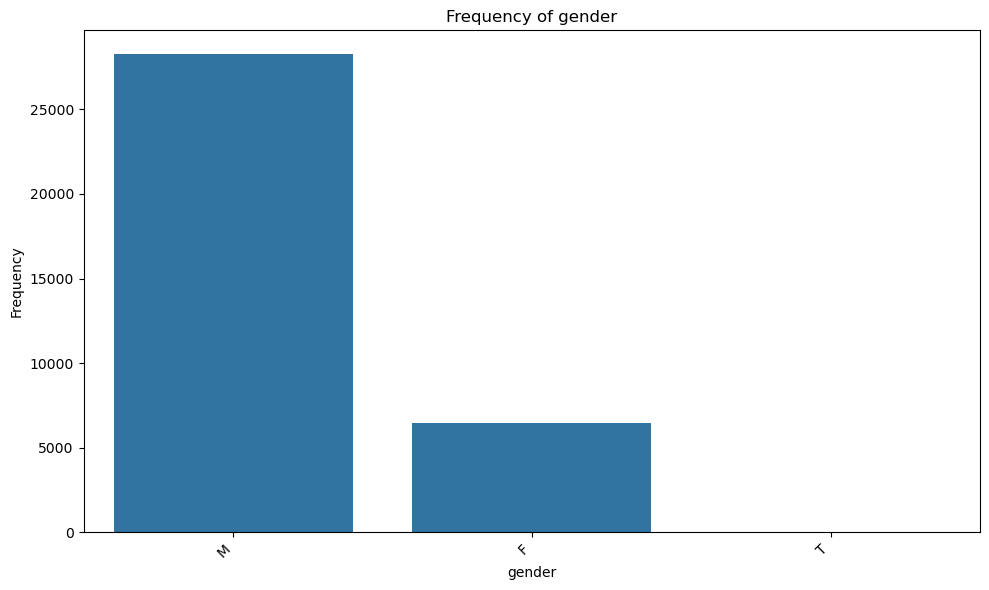

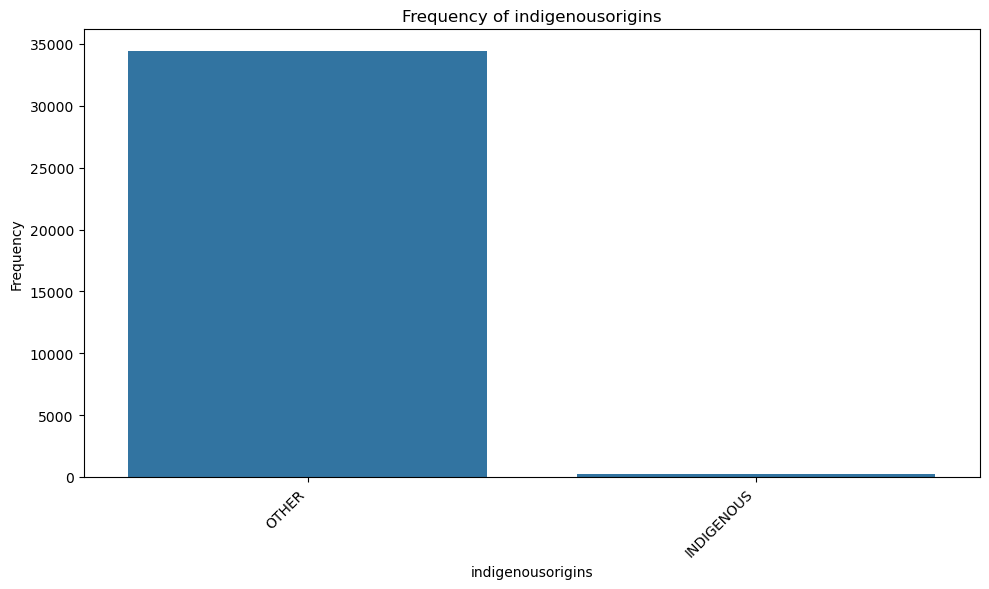

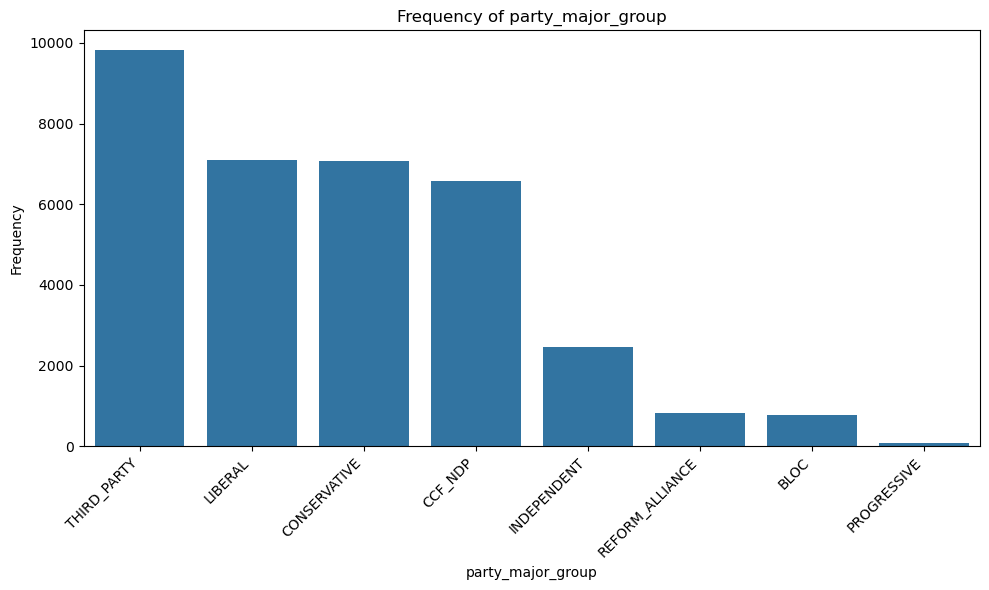

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create bar plots for categorical variables
def plot_categorical_frequencies(df, column_name):
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index)
    plt.title(f'Frequency of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

# Plot for 'gender'
plot_categorical_frequencies(data, 'gender')

# Plot for 'indigenousorigins'
plot_categorical_frequencies(data, 'indigenousorigins')

# Plot for 'party_major_group'
plot_categorical_frequencies(data, 'party_major_group')

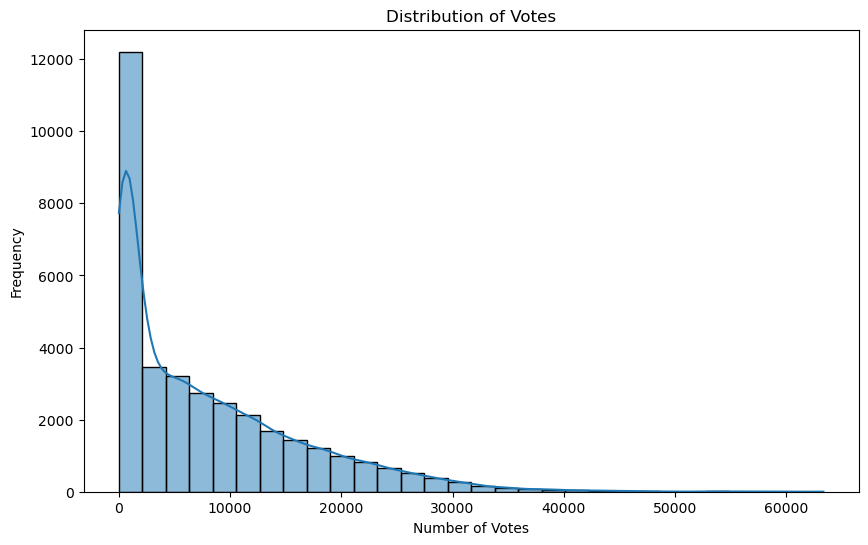

In [34]:
# Plot for 'votes' (histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data['votes'], bins=30, kde=True)  # Adjust number of bins as needed
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis

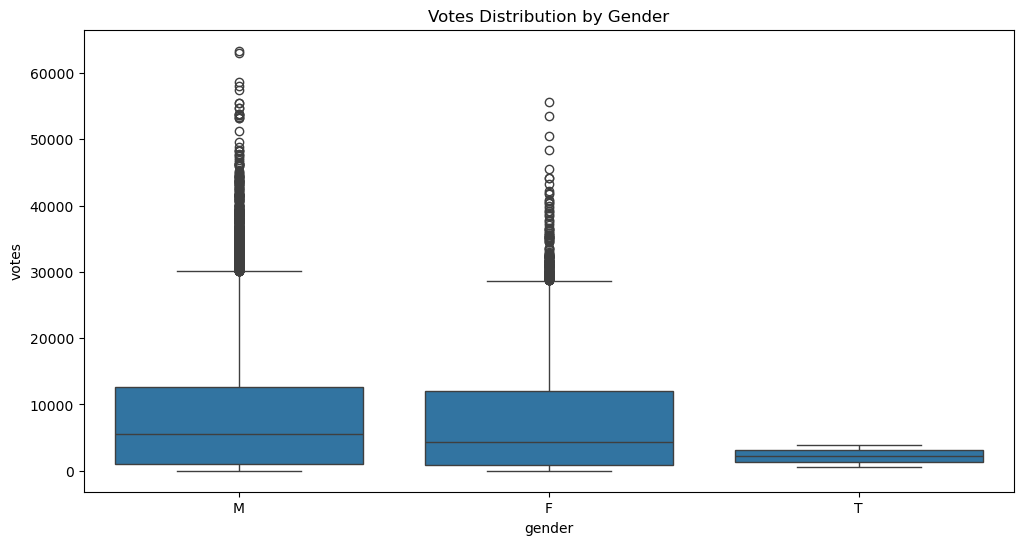

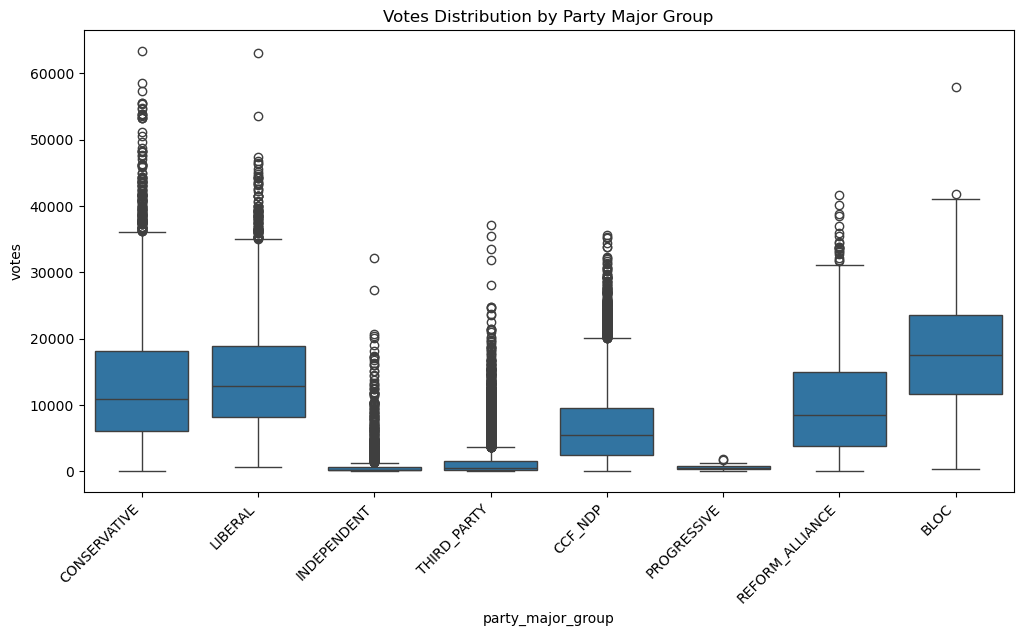

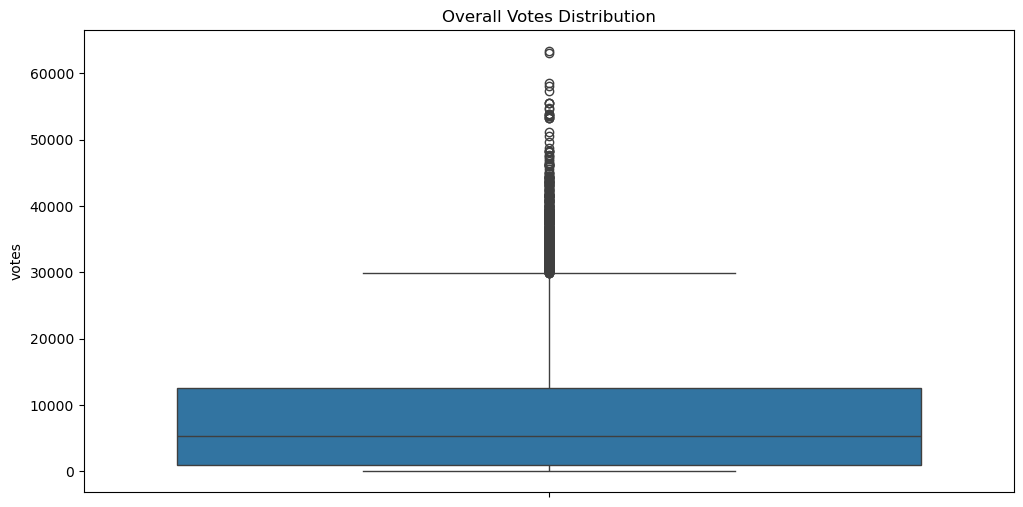

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='votes', data=data)
plt.title('Votes Distribution by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='party_major_group', y='votes', data=data)
plt.title('Votes Distribution by Party Major Group')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(y='votes', data=data)
plt.title('Overall Votes Distribution')
plt.show()

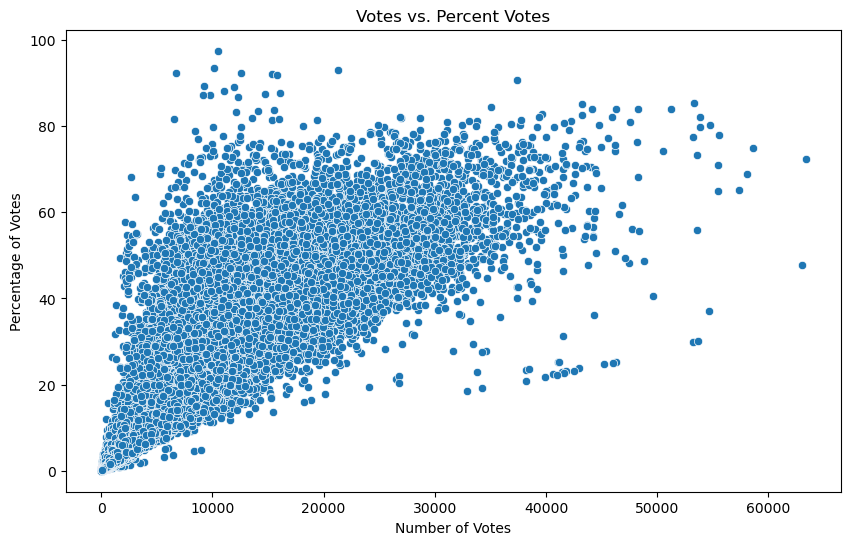

In [37]:
# Scatter plot for votes vs. percent_votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='percent_votes', data=data)
plt.title('Votes vs. Percent Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Percentage of Votes')
plt.show()

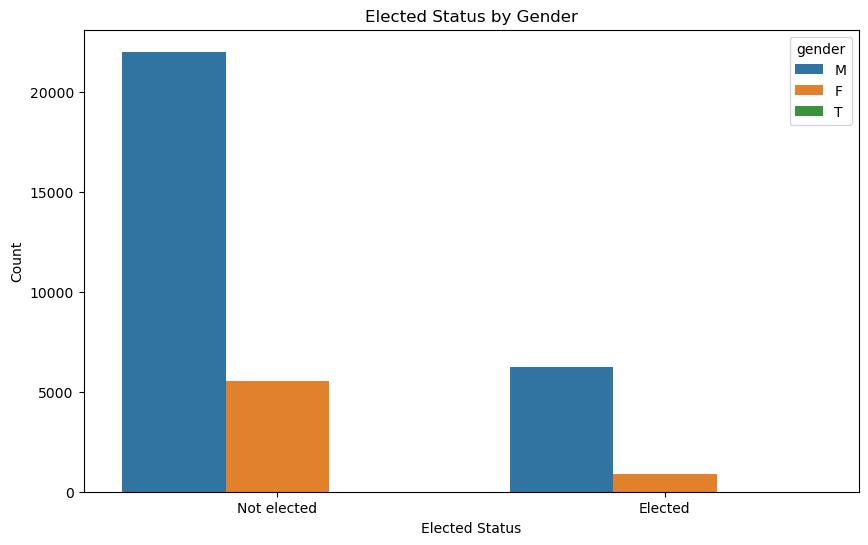

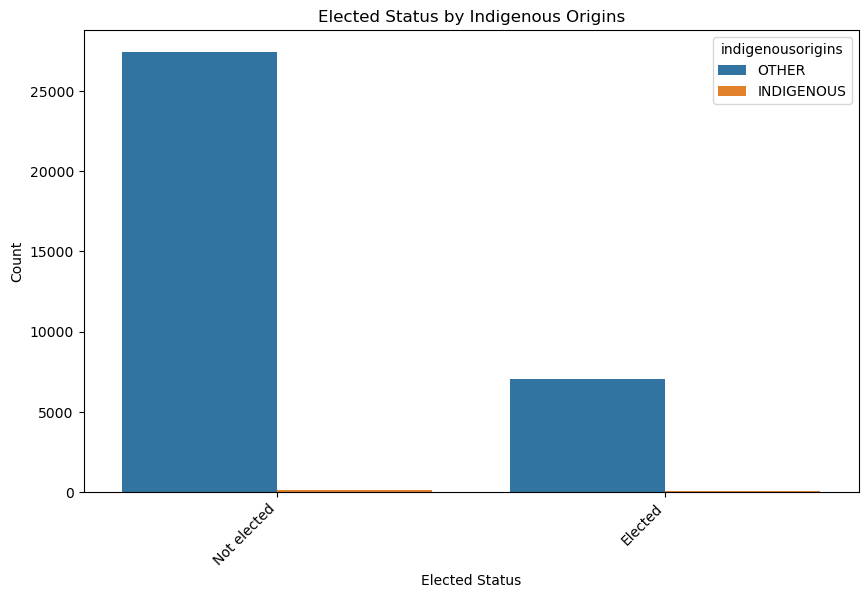

In [38]:
# Grouped bar chart for gender vs. elected
plt.figure(figsize=(10, 6))
sns.countplot(x='elected', hue='gender', data=data)
plt.title('Elected Status by Gender')
plt.xlabel('Elected Status')
plt.ylabel('Count')
plt.show()

# Grouped bar chart for indigenousorigins vs. elected
plt.figure(figsize=(10, 6))
sns.countplot(x='elected', hue='indigenousorigins', data=data)
plt.title('Elected Status by Indigenous Origins')
plt.xlabel('Elected Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

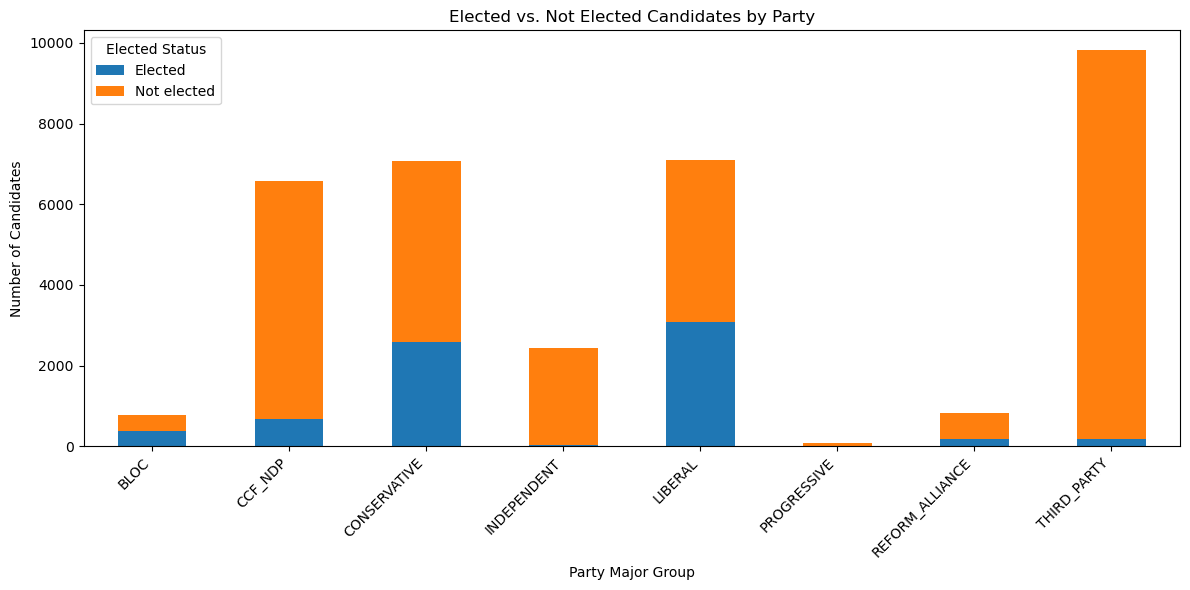

In [39]:
# Group the data by 'party_major_group' and 'elected' and count occurrences
election_counts = data.groupby(['party_major_group', 'elected']).size().unstack(fill_value=0)

# Create the stacked bar chart
election_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Elected vs. Not Elected Candidates by Party')
plt.xlabel('Party Major Group')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Elected Status')
plt.tight_layout()
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Columns for label encoding
label_encode_cols = ['gender','occupation', 'elected','province', 'riding']

# Columns for one-hot encoding
onehot_encode_cols = ['indigenousorigins', 'incumbent']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to selected columns
for col in label_encode_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the specified column
encoded_data = onehot_encoder.fit_transform(data[onehot_encode_cols])

# Create a new DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(onehot_encode_cols))

# Concatenate the one-hot encoded columns with the original DataFrame
data_encoded = pd.concat([data, encoded_df], axis=1)

# Display the first few rows of the updated DataFrame
data_encoded.head()

C:\Users\Yathin Muthavarapu\AppData\Local\Temp\ipykernel_21240\997587895.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col].astype(str))
C:\Users\Yathin Muthavarapu\AppData\Local\Temp\ipykernel_21240\997587895.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col].astype(str))
C:\Users\Yathin Muthavarapu\AppData\Local\Temp\ipykernel_21240\997587895.py:14: SettingWithCopyWarning: 
A value is trying to be set o

,year,type_elxn,elected,candidate_name,incumbent,gender,indigenousorigins,occupation,riding,province,votes,percent_votes,party_major_group,gov_major_group,indigenousorigins_INDIGENOUS,indigenousorigins_OTHER,incumbent_INCUMBENT,incumbent_NOT INCUMBENT
1,1946.0,BY-ELECTION,1.0,Blec Hector,NOT INCUMBENT,1.0,OTHER,1084.0,393.0,10.0,7487,23.525530,CONSERVATIVE,LIBERAL,0.0,1.0,0.0,1.0
2,1946.0,BY-ELECTION,1.0,Labelle Lucien,NOT INCUMBENT,1.0,OTHER,2662.0,393.0,10.0,10379,32.612724,LIBERAL,LIBERAL,0.0,1.0,0.0,1.0
3,1946.0,BY-ELECTION,1.0,Molloy Bernard,NOT INCUMBENT,1.0,OTHER,1934.0,393.0,10.0,1975,6.205813,INDEPENDENT,LIBERAL,0.0,1.0,0.0,1.0
4,1946.0,BY-ELECTION,1.0,Roy Oscar,NOT INCUMBENT,1.0,OTHER,3365.0,393.0,10.0,572,1.797329,INDEPENDENT,LIBERAL,0.0,1.0,0.0,1.0
5,1946.0,BY-ELECTION,0.0,Caouette Ral,NOT INCUMBENT,1.0,OTHER,2850.0,393.0,10.0,11412,35.858601,THIRD_PARTY,LIBERAL,0.0,1.0,0.0,1.0


In [41]:
data_encoded_corr = data_encoded.select_dtypes(include=['number'])

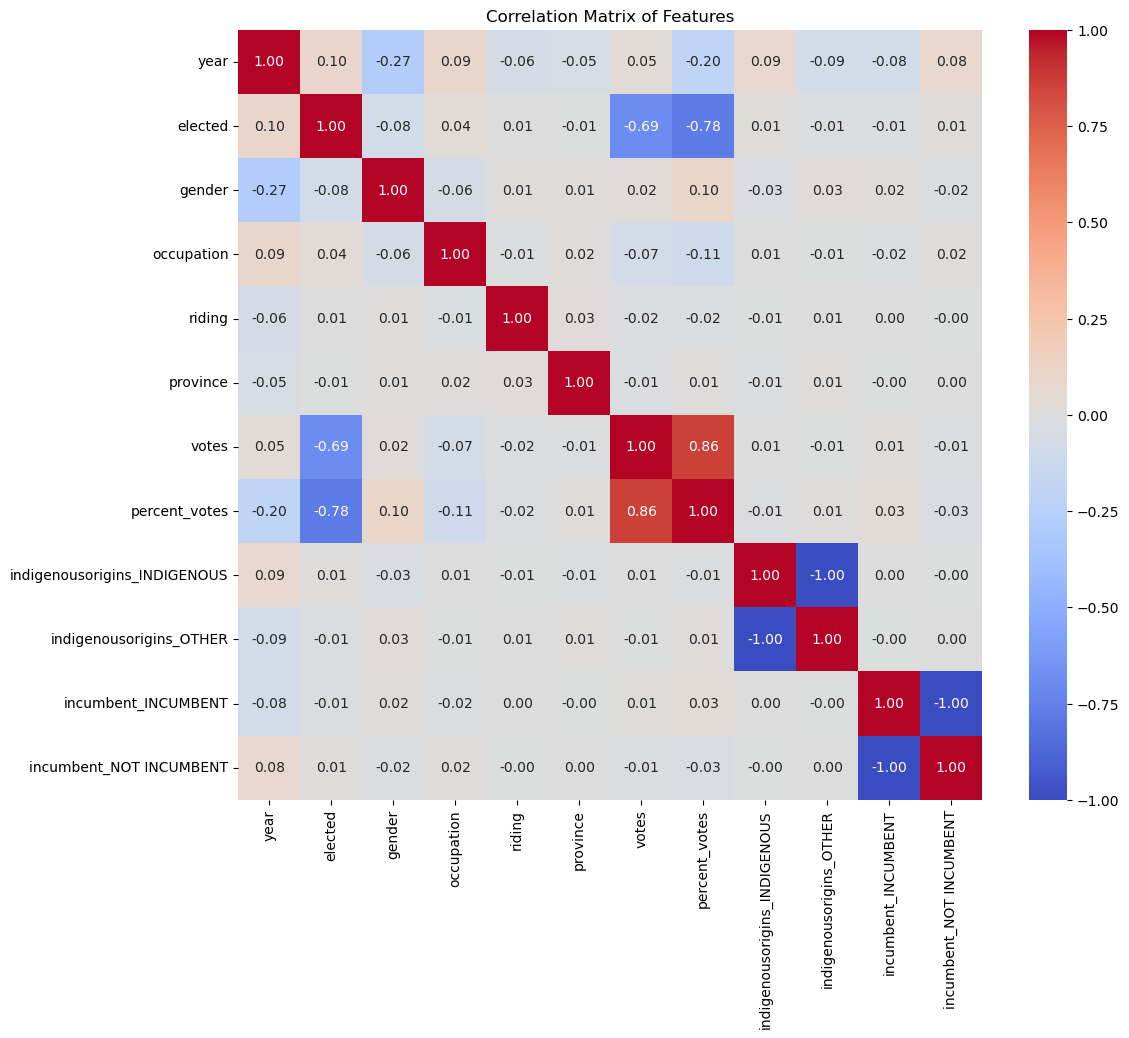

In [42]:
# Calculate the correlation matrix
correlation_matrix = data_encoded_corr.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [43]:
# Columns for one-hot encoding
onehot_encode_cols = ['party_major_group','elected']

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the specified column
party_data = onehot_encoder.fit_transform(data[onehot_encode_cols])

# Create a new DataFrame with the one-hot encoded columns
party_df = pd.DataFrame(party_data, columns=onehot_encoder.get_feature_names_out(onehot_encode_cols))

party_df.head()

,party_major_group_BLOC,party_major_group_CCF_NDP,party_major_group_CONSERVATIVE,party_major_group_INDEPENDENT,party_major_group_LIBERAL,party_major_group_PROGRESSIVE,party_major_group_REFORM_ALLIANCE,party_major_group_THIRD_PARTY,elected_0,elected_1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


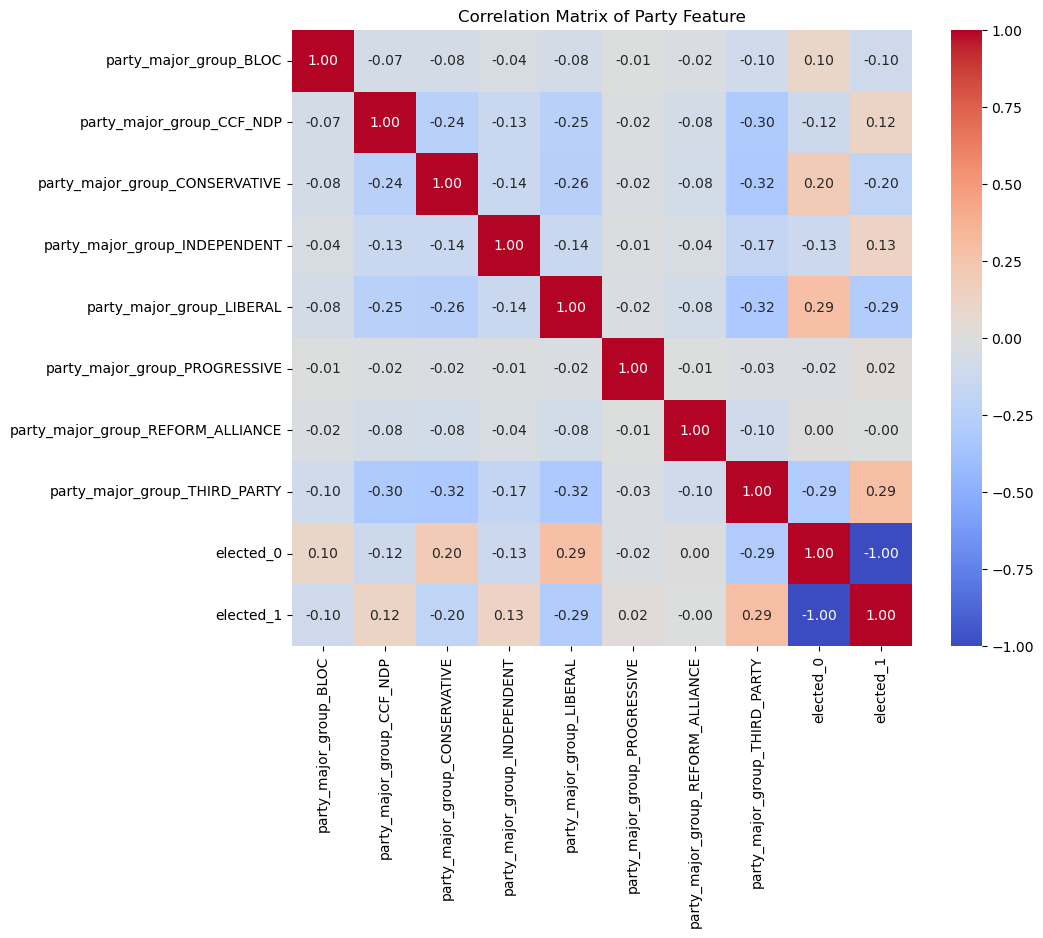

In [44]:
# Calculate the correlation matrix
correlation_matrix = party_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Party Feature')
plt.show()

## ML Models


In [46]:
data.head()


,year,type_elxn,elected,candidate_name,incumbent,gender,indigenousorigins,occupation,riding,province,votes,percent_votes,party_major_group,gov_major_group
count,,,,,,,,,,,,,,
1,1946,BY-ELECTION,1,Blec Hector,NOT INCUMBENT,1,OTHER,1084,393,10,7487,23.525530,CONSERVATIVE,LIBERAL
2,1946,BY-ELECTION,1,Labelle Lucien,NOT INCUMBENT,1,OTHER,2662,393,10,10379,32.612724,LIBERAL,LIBERAL
3,1946,BY-ELECTION,1,Molloy Bernard,NOT INCUMBENT,1,OTHER,1934,393,10,1975,6.205813,INDEPENDENT,LIBERAL
4,1946,BY-ELECTION,1,Roy Oscar,NOT INCUMBENT,1,OTHER,3365,393,10,572,1.797329,INDEPENDENT,LIBERAL
5,1946,BY-ELECTION,0,Caouette Ral,NOT INCUMBENT,1,OTHER,2850,393,10,11412,35.858601,THIRD_PARTY,LIBERAL


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [48]:
# Load the dataset
df = data
df.head()

,year,type_elxn,elected,candidate_name,incumbent,gender,indigenousorigins,occupation,riding,province,votes,percent_votes,party_major_group,gov_major_group
count,,,,,,,,,,,,,,
1,1946,BY-ELECTION,1,Blec Hector,NOT INCUMBENT,1,OTHER,1084,393,10,7487,23.525530,CONSERVATIVE,LIBERAL
2,1946,BY-ELECTION,1,Labelle Lucien,NOT INCUMBENT,1,OTHER,2662,393,10,10379,32.612724,LIBERAL,LIBERAL
3,1946,BY-ELECTION,1,Molloy Bernard,NOT INCUMBENT,1,OTHER,1934,393,10,1975,6.205813,INDEPENDENT,LIBERAL
4,1946,BY-ELECTION,1,Roy Oscar,NOT INCUMBENT,1,OTHER,3365,393,10,572,1.797329,INDEPENDENT,LIBERAL
5,1946,BY-ELECTION,0,Caouette Ral,NOT INCUMBENT,1,OTHER,2850,393,10,11412,35.858601,THIRD_PARTY,LIBERAL


In [49]:
# Drop missing values in important columns
df.dropna(inplace=True)

In [50]:
data.columns

Index(['year', 'type_elxn', 'elected', 'candidate_name', 'incumbent', 'gender',
       'indigenousorigins', 'occupation', 'riding', 'province', 'votes',
       'percent_votes', 'party_major_group', 'gov_major_group'],
      dtype='object')

In [51]:
df=df.drop(columns=['candidate_name','votes','percent_votes'])

In [52]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['type_elxn','incumbent','indigenousorigins','province', 'occupation', 'riding', 'party_major_group', 'gov_major_group']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,year,type_elxn,elected,incumbent,gender,indigenousorigins,occupation,riding,province,party_major_group,gov_major_group
count,,,,,,,,,,,
1,1946,0,1,1,1,1,1084,393,10,2,1
2,1946,0,1,1,1,1,2662,393,10,4,1
3,1946,0,1,1,1,1,1934,393,10,3,1
4,1946,0,1,1,1,1,3365,393,10,3,1
5,1946,0,0,1,1,1,2850,393,10,7,1


In [53]:
# Define features and target variable
y = df['elected']
X = df.drop(columns=['elected'])

In [54]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print('\nLogistic Regression Performance:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_log):.4f}')
print(classification_report(y_test, y_pred_log))


Logistic Regression Performance:
Accuracy: 0.8823
              precision    recall  f1-score   support

           0       0.77      0.62      0.69      2159
           1       0.91      0.95      0.93      8249

    accuracy                           0.88     10408
   macro avg       0.84      0.79      0.81     10408
weighted avg       0.88      0.88      0.88     10408



C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Performance:
Accuracy: 0.8966
              precision    recall  f1-score   support

           0       0.78      0.69      0.74      2159
           1       0.92      0.95      0.94      8249

    accuracy                           0.90     10408
   macro avg       0.85      0.82      0.84     10408
weighted avg       0.89      0.90      0.89     10408



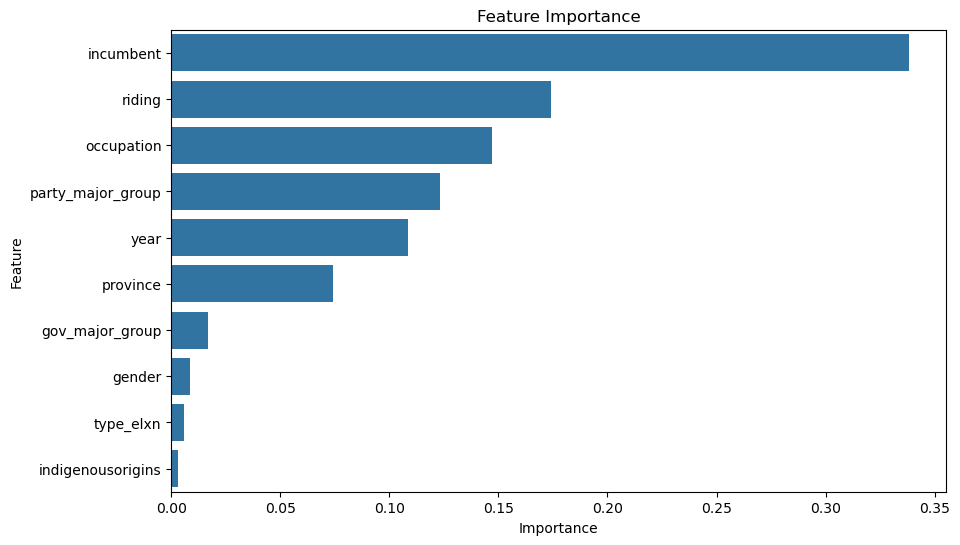

In [56]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('\nRandom Forest Performance:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(classification_report(y_test, y_pred_rf))

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [57]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print('\nXGBoost Performance:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}')
print(classification_report(y_test, y_pred_xgb))


XGBoost Performance:
Accuracy: 0.9009
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      2159
           1       0.93      0.95      0.94      8249

    accuracy                           0.90     10408
   macro avg       0.86      0.83      0.84     10408
weighted avg       0.90      0.90      0.90     10408



C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:32:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [58]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print('\nDecision Tree Performance:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}')
print(classification_report(y_test, y_pred_dt))


Decision Tree Performance:
Accuracy: 0.8820
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      2159
           1       0.92      0.93      0.93      8249

    accuracy                           0.88     10408
   macro avg       0.82      0.82      0.82     10408
weighted avg       0.88      0.88      0.88     10408



In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
import joblib

# Load dataset (replace with your dataset file)
df = pd.read_excel('canada election data 1946-2021.xlsx')
df = df.drop(['candidate_name', 'votes'], axis=1)
# Define categorical columns that need encoding
categorical_columns = ['type_elxn','incumbent', 'indigenousorigins','gender', 'province','occupation', 'riding', 'party_major_group','gov_major_group']

# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
# Create a LabelEncoder for the 'elected' column
elected_encoder = LabelEncoder()

# Fit and transform the 'elected' column
df['elected_encoded'] = elected_encoder.fit_transform(df['elected'])


# Define features and target variables
# Drop the original 'elected' column and the encoded 'elected_encoded' column from the features
X = df.drop(columns=['elected', 'percent_votes', 'elected_encoded'])
y_classification = df['elected_encoded']  # Target for classification using encoded values
y_regression = df['percent_votes']  # Target for regression

# Split into training and test sets
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Train XGBoost Classifier (Election Outcome)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train_class)

# Train XGBoost Regressor (Vote Percentage)
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train_reg, y_train_reg)

# Save models
xgb_classifier.save_model("xgboost_election_classifier.json")
xgb_regressor.save_model("xgboost_vote_regressor.json")

# Save label encoders
# Include the elected_encoder in the saved label encoders
label_encoders['elected'] = elected_encoder
joblib.dump(label_encoders, "label_encoders.pkl")

print("Models and encoders saved successfully!")

C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:33:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Models and encoders saved successfully!


In [117]:
import pandas as pd
import joblib
from xgboost import XGBClassifier, XGBRegressor

# Load saved label encoders
label_encoders = joblib.load("label_encoders.pkl")

# Display available encoders
print("Available Encoders and their Classes:")
for col, encoder in label_encoders.items():
    print(f"{col}: {list(encoder.classes_)}")

def predict_election_outcome(year, type_elxn, incumbent, gender, riding, party_name, gov_major_group, indigenous_origin, province, occupation):
    # Load trained models
    xgb_classifier = XGBClassifier()
    xgb_classifier.load_model("xgboost_election_classifier.json")

    xgb_regressor = XGBRegressor()
    xgb_regressor.load_model("xgboost_vote_regressor.json")

    # Create input DataFrame
    input_data = pd.DataFrame({
        'year': [year],
        'type_elxn': [type_elxn],
        'incumbent': [incumbent],
        'gender': [gender],
        'indigenousorigins': [indigenous_origin],
        'occupation': [occupation],
        'riding': [riding],
        'province': [province],
        'party_major_group': [party_name],
        'gov_major_group': [gov_major_group]
    })

    # Encode categorical features using saved label encoders
    categorical_columns = ['type_elxn', 'incumbent', 'indigenousorigins', 'gender', 'province', 'occupation', 'riding', 'party_major_group', 'gov_major_group']

    for col in categorical_columns:
        if col in label_encoders:
            encoder = label_encoders[col]
            if input_data[col][0] in encoder.classes_:
                input_data[col] = encoder.transform(input_data[col])
            else:
                print(f"Warning: '{input_data[col][0]}' not found in encoder for column '{col}'. Assigning 'Unknown' value.")
                input_data[col] = -1  # Assigning an unknown category as -1

    # Predict election outcome
    prediction = xgb_classifier.predict(input_data)
    probability = xgb_classifier.predict_proba(input_data)

    # Predict winning vote percentage
    predicted_vote_percentage = xgb_regressor.predict(input_data)

    # Decode election outcome
    elected_decoder = label_encoders['elected']
    elected_label = elected_decoder.inverse_transform([prediction[0]])[0]

    return elected_label, probability[0][1] * 100, predicted_vote_percentage[0]

# Example Usage:
# Input format--> Year, Election Type, Incumbent, Gender, Riding, Party Name, Government Party Name, Indigenous Origins, Province, Occupation
elected, winning_probability, vote_percentage = predict_election_outcome(
    2025, 'GENERAL', 'INCUMBENT', 'M', 'WINDSOR WEST', 'CCF_NDP', 'LIBERAL', 'OTHER', 'ONTARIO', 'PROFESSOR')

print(f"\nPredicted Outcome: {elected}")
print(f"Predicted Vote Percentage: {vote_percentage:.2f}%")

Available Encoders and their Classes:
type_elxn: ['BY-ELECTION', 'GENERAL']
incumbent: ['INCUMBENT', 'NOT INCUMBENT']
indigenousorigins: ['INDIGENOUS', 'OTHER']
gender: ['F', 'M', 'T']
province: ['ALBERTA', 'BRITISH COLUMBIA', 'MANITOBA', 'NEW BRUNSWICK', 'NEWFOUNDLAND AND LABRADOR', 'NORTHWEST TERRITORIES', 'NOVA SCOTIA', 'NUNAVUT', 'ONTARIO', 'PRINCE EDWARD ISLAND', 'QUEBEC', 'SASKATCHEWAN', 'YUKON']
occupation: ['ACADEMIC', 'ACADEMIC ADVISOR', 'ACCOMMODATION MANAGER', 'ACCOUNT EXECUTIVE', 'ACCOUNT MANAGER', 'ACCOUNT MANAGER  STUDENT', 'ACCOUNT REPRESENTATIVE', 'ACCOUNTANT', 'ACCOUNTANT AND BUSINESS MANAGEMENT', 'ACCOUNTANT AND REALTOR', 'ACCOUNTANT AUDITOR', 'ACCOUNTANT MANAGER', 'ACCOUNTING', 'ACCOUNTING ADMINISTRATOR', 'ACCOUNTING AND PAYROLL', 'ACCOUNTING ASSISTANT', 'ACCOUNTING CLERK', 'ACCOUNTING CONSULTANT', 'ACCOUNTING SECRETARY', 'ACCOUNTING TEACHER', 'ACCOUNTING TECHNICIAN', 'ACCOUNTS ADMINISTRATOR', 'ACCOUNTS CLERK', 'ACCOUNTS EXECUTIVE', 'ACCOUNTS MANAGER', 'ACCOUNTS PAYA

In [119]:
# Input format--> Year, Election Type, Incumbent, Gender, Riding, Party Name, Government Party Name, Indigenous Origins, Province, Occupation
elected, winning_probability, vote_percentage = predict_election_outcome(
    2025, 'GENERAL', 'INCUMBENT', 'M', 'WINDSOR', 'LIBERAL', 'LIBERAL', 'OTHER', 'ONTARIO', 'COUNCILLOR')

print(f"\nPredicted Outcome: {elected}")
print(f"Predicted Vote Percentage: {vote_percentage:.2f}%")


Predicted Outcome: Elected
Predicted Vote Percentage: 49.49%


In [121]:
# Input format--> Year, Election Type, Incumbent, Gender, Riding, Party Name, Government Party Name, Indigenous Origins, Province, Occupation
elected, winning_probability, vote_percentage = predict_election_outcome(
    2025, 'GENERAL', 'NOT INCUMBENT', 'M', 'WINDSOR', 'CCF_NDP', 'LIBERAL', 'OTHER', 'ONTARIO', 'UNION LEADER')

print(f"\nPredicted Outcome: {elected}")
print(f"Predicted Vote Percentage: {vote_percentage:.2f}%")


Predicted Outcome: Not elected
Predicted Vote Percentage: 20.95%


In [123]:
# Input format--> Year, Election Type, Incumbent, Gender, Riding, Party Name, Government Party Name, Indigenous Origins, Province, Occupation
elected, winning_probability, vote_percentage = predict_election_outcome(
    2025, 'GENERAL', 'NOT INCUMBENT', 'M', 'EDMONTON', 'LIBERAL', 'LIBERAL', 'OTHER', 'ALBERTA', 'COUNCILLOR')

print(f"\nPredicted Outcome: {elected}")
print(f"Predicted Vote Percentage: {vote_percentage:.2f}%")


Predicted Outcome: Not elected
Predicted Vote Percentage: 20.26%


In [125]:
# Input format--> Year, Election Type, Incumbent, Gender, Riding, Party Name, Government Party Name, Indigenous Origins, Province, Occupation
elected, winning_probability, vote_percentage = predict_election_outcome(
    2025, 'GENERAL', 'INCUMBENT', 'F', 'EDMONTON MANNING', 'CCF_NDP', 'LIBERAL', 'OTHER', 'ALBERTA', 'SOCIAL WORKER')

print(f"\nPredicted Outcome: {elected}")
print(f"Predicted Vote Percentage: {vote_percentage:.2f}%")


Predicted Outcome: Elected
Predicted Vote Percentage: 38.75%
